In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# Análise Notebook Pessoal

Análise feita usando meu notebook pessoal. Configurações da máquina:
- SO: Windows 10 64bits 
- Modelo de hardware: Aspire A315-41
- Memória ram: 12 GB DDR4
- Processador: AMD Ryzen 5 2500U
- Placa de vídeo: Radeon Vega Mobile Gfx 2.00 GHz integrada no processador
- Disco rígido: 790 GB HDD

## Procurando números primos

### Criando Dataset

In [171]:
df_primos = pd.read_csv("dataset-primos.csv")

In [172]:
df_primos = df_primos.sort_values(by="NumThreads")

# Salvar o dataset ordenado em um arquivo CSV
output_file = "dataset-primos.csv"
df_primos.to_csv(output_file, index=False)

### Questão 1

#### a)

In [173]:
# Ordenar os dados pelo número máximo de primos
df_primos_qt_01 = df_primos[df_primos["NumeroMaximo"]==110000]
uso_cpu = df_primos_qt_01.sort_values(by="MeanUtilization", ascending=True)

uso_cpu = uso_cpu[["NumThreads", "MeanUtilization"]]
display(uso_cpu)

,NumThreads,MeanUtilization
0,2,0.329480
1,4,0.569866
4,6,0.812349
57,40,0.976138
29,22,0.977020
37,36,0.985635
34,32,0.988988
33,30,0.992304
28,20,0.992901
31,26,0.996644


##### Gráfico 1

C:\Users\bruns\AppData\Local\Temp\ipykernel_20660\749189394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_primos_qt_01["MeanUtilizationPercent"] = df_primos_qt_01["MeanUtilization"] * 100


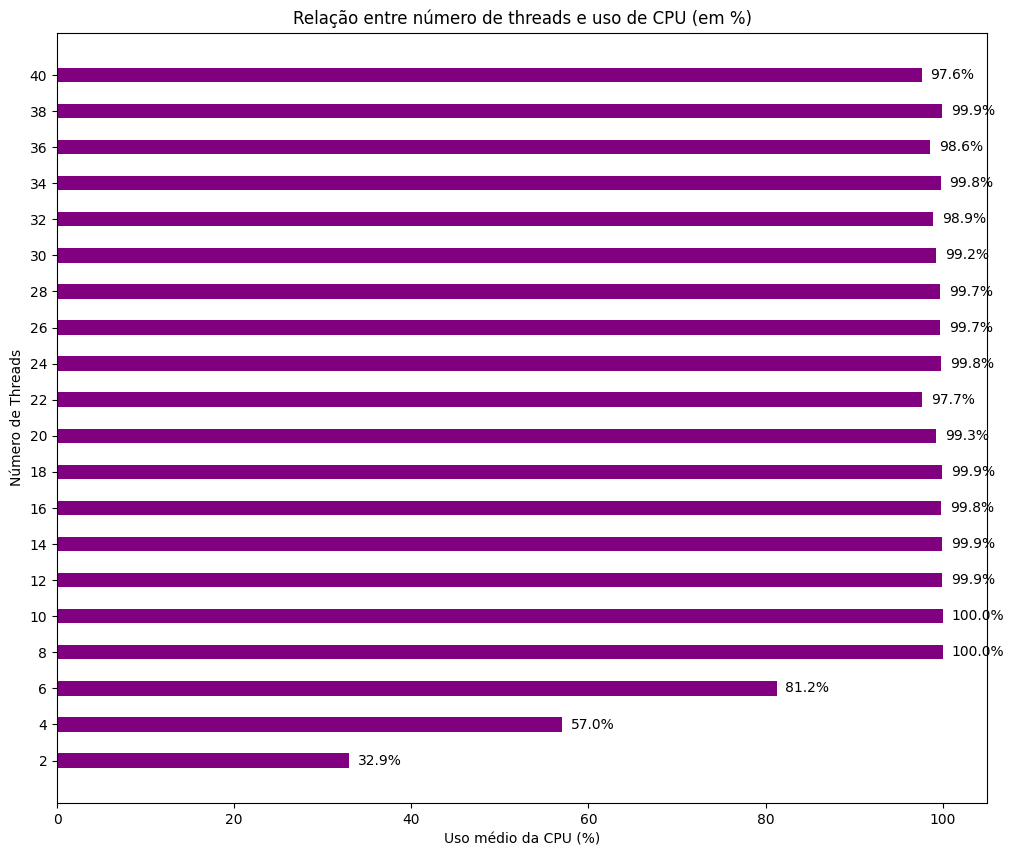

In [174]:
# Convertendo valores para porcentagem
df_primos_qt_01["MeanUtilizationPercent"] = df_primos_qt_01["MeanUtilization"] * 100

plt.figure(figsize=(12, 10))
bars = plt.barh(df_primos_qt_01["NumThreads"], df_primos_qt_01["MeanUtilizationPercent"], color='purple')

for bar in bars:
    plt.text(
        bar.get_width() + 1,  # Posição horizontal (após a barra)
        bar.get_y() + bar.get_height() / 2,  # Centralizado verticalmente
        f'{bar.get_width():.1f}%',  # Valor formatado como porcentagem
        va='center'
    )

num_threads = df_primos_qt_01["NumThreads"]

plt.yticks(ticks=range(min(num_threads), max(num_threads) + 1, 2))
plt.title("Relação entre número de threads e uso de CPU (em %)")
plt.xlabel("Uso médio da CPU (%)")
plt.ylabel("Número de Threads")

plt.savefig('grafico_uso_cpu.jpeg', format='jpeg', bbox_inches='tight')

plt.show()


#### b)

In [175]:
# Ordenar os dados pelo número de threads
df_primos_qt_01 = df_primos[df_primos["NumeroMaximo"]==110000]
temp_total_exec = df_primos_qt_01.sort_values(by="ElapsedTime", ascending=True)

# Exibir apenas as colunas desejadas
temp_total_exec = temp_total_exec[["NumThreads", "MeanUtilization","ElapsedTime"]]
display(temp_total_exec.style.hide(axis='index'))

NumThreads,MeanUtilization,ElapsedTime
34,0.997525,3596
6,0.812349,3598
28,0.996740,3602
12,0.998976,3618
36,0.985635,3620
20,0.992901,3629
16,0.998341,3632
32,0.988988,3632
8,1.000000,3638
38,0.999252,3640


##### Gráfico 2

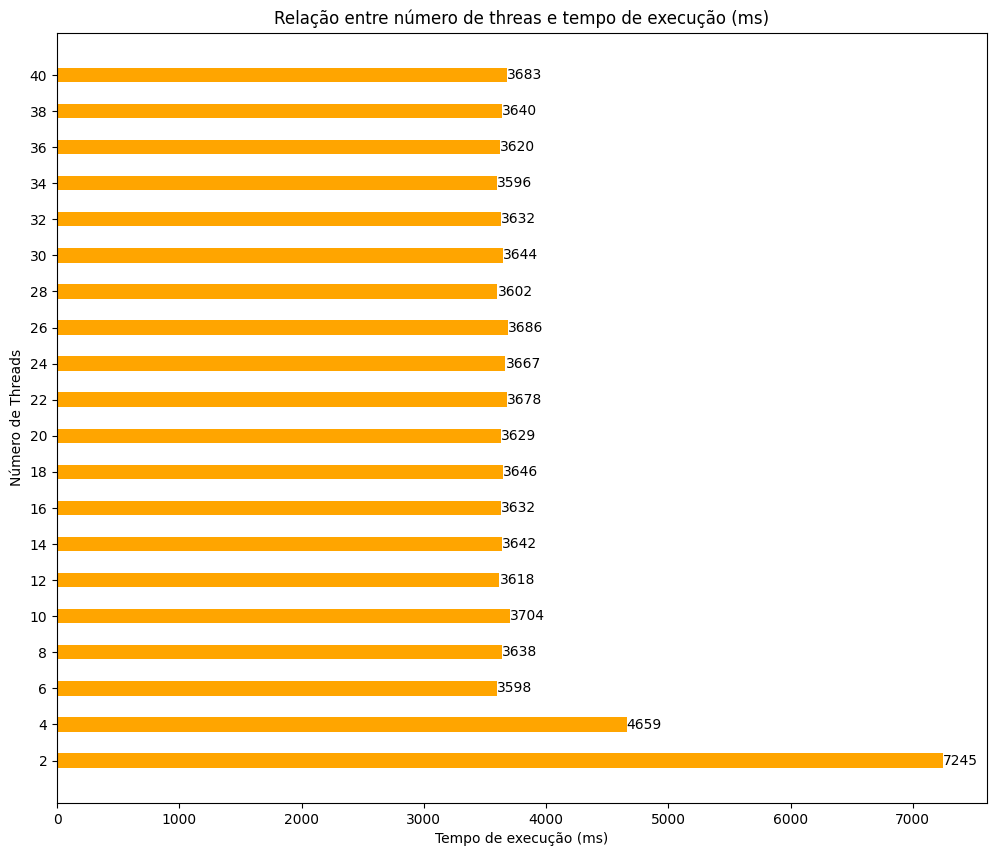

In [176]:
plt.figure(figsize=(12, 10))
bars = plt.barh(df_primos_qt_01["NumThreads"], df_primos_qt_01["ElapsedTime"], color='orange')

# Adicionando os valores nas barras
for bar in bars:
    plt.text(
        bar.get_width() + 1,  # Posição horizontal (após a barra)
        bar.get_y() + bar.get_height() / 2,  # Centralizado verticalmente
        f'{bar.get_width()}',  # Valor formatado como porcentagem
        va='center'
    )

# Espaçamento entre as barras
num_threads = df_primos_qt_01["NumThreads"]
plt.yticks(ticks=range(min(num_threads), max(num_threads) + 1, 2))

plt.title("Relação entre número de threas e tempo de execução (ms)")
plt.xlabel("Tempo de execução (ms)")
plt.ylabel("Número de Threads")

plt.savefig('grafico_temp_execucao.jpeg', format='jpeg', bbox_inches='tight')

plt.show()


### 2    

#### a)

##### usando 6 threads

In [177]:
# Ordenar os dados pelo número de threads
df_primos_qt_02 = df_primos[df_primos["NumThreads"]==6]
temp_exec = df_primos_qt_02.sort_values(by="ElapsedTime", ascending=True)

temp_exec = temp_exec[["NumThreads","NumeroMaximo","ElapsedTime"]]
temp_exec = temp_exec.reset_index(drop=True)
display(temp_exec.style.hide(axis='index'))

NumThreads,NumeroMaximo,ElapsedTime
6,10000,63
6,20000,172
6,30000,328
6,40000,540
6,50000,856
6,60000,1235
6,70000,1622
6,80000,2117
6,90000,2698
6,100000,3230


O resultado demonstra claramente um aumento, entretando, não se dá de maneira linear, evidenciando a complexidade da tarefa dada pelo algoritmo, limitações de paralelização e um maior consumo dos recursos do sistema.

Os Gráficos 3 e 4 evidenciam isso.

##### Gráficos 3 e 4

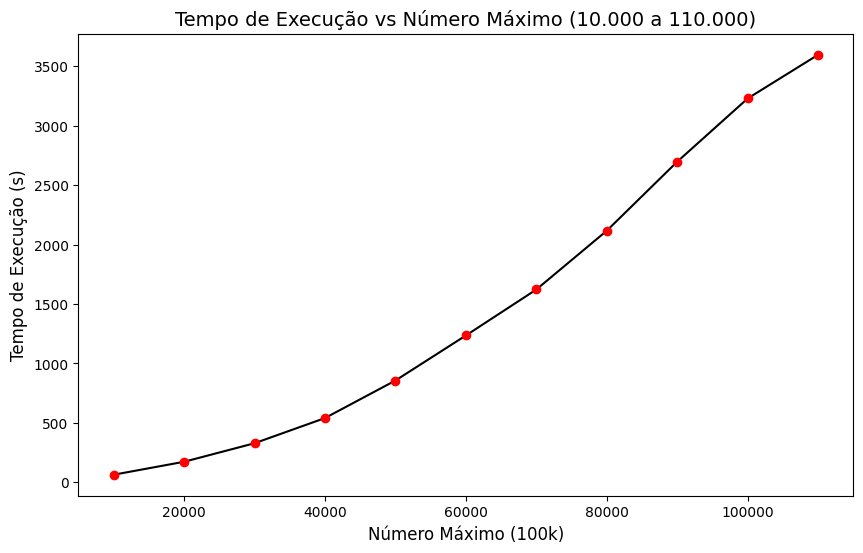

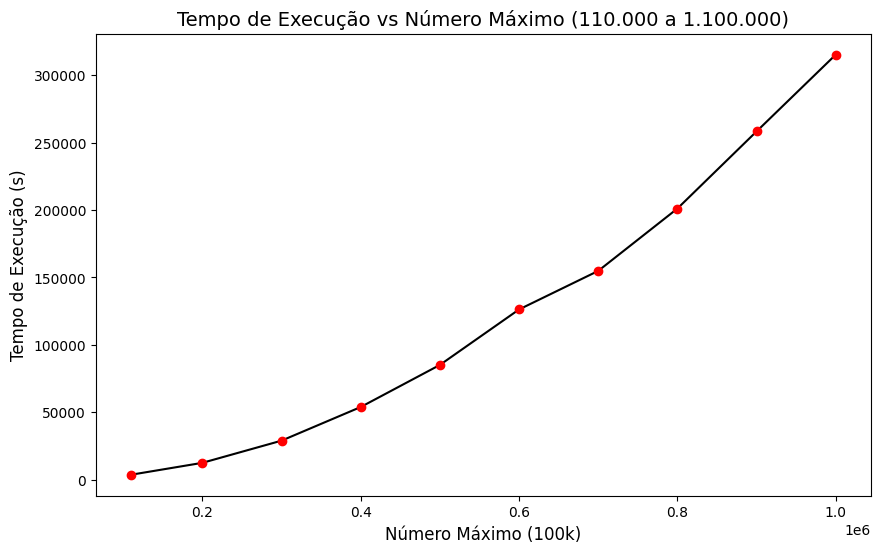

In [ ]:
df_intervalo1 = temp_exec[temp_exec["NumeroMaximo"] <= 110000]  # Valores menores ou iguais a 110000
df_intervalo2 = temp_exec[temp_exec["NumeroMaximo"] >= 110000]  # Valores maiores ou iguais a 110000

df_intervalo1 = df_intervalo1.sort_values(by="ElapsedTime", ascending=True)

# Gerar o primeiro gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_intervalo1["NumeroMaximo"], df_intervalo1["ElapsedTime"], color='black', label='Linha de Execução')
plt.scatter(df_intervalo1["NumeroMaximo"], df_intervalo1["ElapsedTime"], color='red', zorder=5)
plt.xlabel("Número Máximo (100k)", fontsize=12)
plt.ylabel("Tempo de Execução (s)", fontsize=12)
plt.title("Tempo de Execução vs Número Máximo (10.000 a 110.000)", fontsize=14)

plt.savefig('grafico_escalabilidade_exec_01.jpeg', format='jpeg', bbox_inches='tight')

plt.show()

df_intervalo2 = df_intervalo2.sort_values(by="ElapsedTime", ascending=True)

# Gerar o segundo gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_intervalo2["NumeroMaximo"], df_intervalo2["ElapsedTime"], color='black', label='Linha de Execução')
plt.scatter(df_intervalo2["NumeroMaximo"], df_intervalo2["ElapsedTime"], color='red', zorder=5)
plt.xlabel("Número Máximo (100k)", fontsize=12)
plt.ylabel("Tempo de Execução (s)", fontsize=12)
plt.title("Tempo de Execução vs Número Máximo (110.000 a 1.100.000)", fontsize=14)

plt.savefig('grafico_escalabilidade_exec_02.jpeg', format='jpeg', bbox_inches='tight')

plt.show()

##### Usando 36 threads

In [179]:
# Ordenar os dados pelo número de threads
df_primos_qt_02 = df_primos[df_primos["NumThreads"]==36]
temp_exec = df_primos_qt_02.sort_values(by="ElapsedTime", ascending=True)

temp_exec = temp_exec[["NumThreads","NumeroMaximo","ElapsedTime"]]
display(temp_exec.style.hide(axis='index'))

NumThreads,NumeroMaximo,ElapsedTime
36,10000,82
36,20000,151
36,30000,304
36,40000,530
36,50000,801
36,60000,1195
36,70000,1570
36,80000,2022
36,90000,2484
36,100000,3054


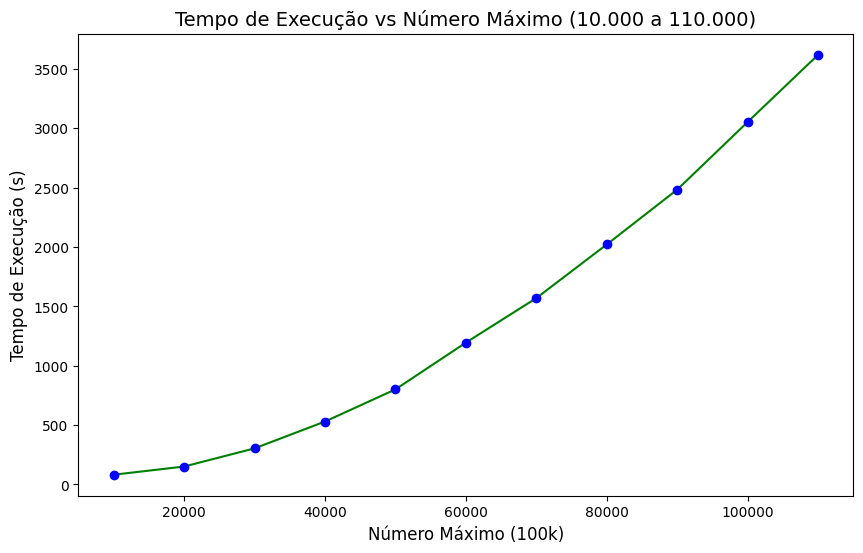

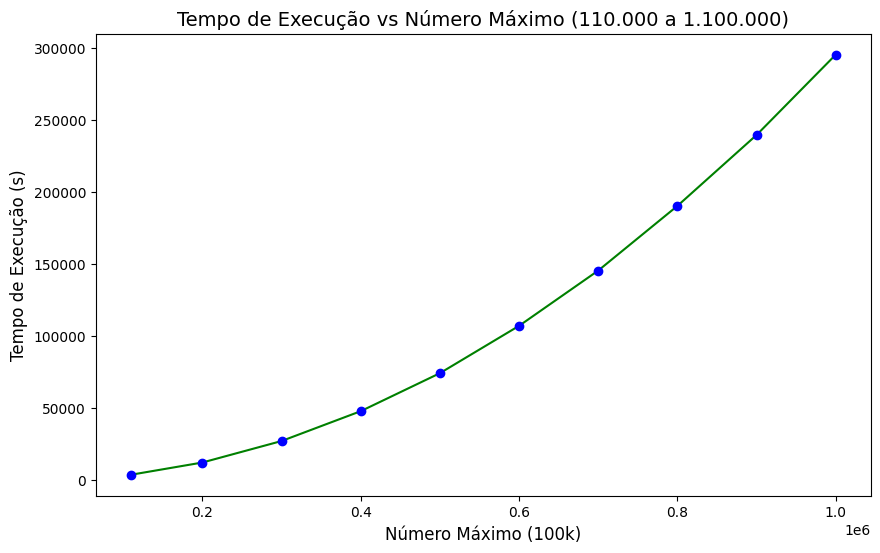

In [ ]:
df_intervalo1 = temp_exec[temp_exec["NumeroMaximo"] <= 110000]  # Valores menores ou iguais a 110000
df_intervalo2 = temp_exec[temp_exec["NumeroMaximo"] >= 110000]  # Valores maiores ou iguais a 110000

df_intervalo1 = df_intervalo1.sort_values(by="ElapsedTime", ascending=True)

# Gerar o primeiro gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_intervalo1["NumeroMaximo"], df_intervalo1["ElapsedTime"], color='green', label='Linha de Execução')
plt.scatter(df_intervalo1["NumeroMaximo"], df_intervalo1["ElapsedTime"], color='blue', zorder=5)
plt.xlabel("Número Máximo (100k)", fontsize=12)
plt.ylabel("Tempo de Execução (s)", fontsize=12)
plt.title("Tempo de Execução vs Número Máximo (10.000 a 110.000)", fontsize=14)

plt.savefig('grafico_escalabilidade_exec_03.jpeg', format='jpeg', bbox_inches='tight')

plt.show()

df_intervalo2 = df_intervalo2.sort_values(by="ElapsedTime", ascending=True)

# Gerar o segundo gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_intervalo2["NumeroMaximo"], df_intervalo2["ElapsedTime"], color='green', label='Linha de Execução')
plt.scatter(df_intervalo2["NumeroMaximo"], df_intervalo2["ElapsedTime"], color='blue', zorder=5)
plt.xlabel("Número Máximo (100k)", fontsize=12)
plt.ylabel("Tempo de Execução (s)", fontsize=12)
plt.title("Tempo de Execução vs Número Máximo (110.000 a 1.100.000)", fontsize=14)

plt.savefig('grafico_escalabilidade_exec_04.jpeg', format='jpeg', bbox_inches='tight')

plt.show()

## Fazendo acessos à memória

### Criando dataset

In [181]:
df_memoria = pd.read_csv("dataset-memoria.csv")

EmptyDataError: No columns to parse from file

In [11]:
df_memoria = df_memoria.sort_values(by="KBinMemory")

# Salvar o dataset ordenado em um arquivo CSV
output_file = "dataset-memoria.csv"
df_memoria.to_csv(output_file, index=False)

### Questão 1

#### a)

In [12]:
tempo_busca = df_memoria.sort_values(by="SearchTime",ascending=True)
tempo_busca = tempo_busca[["KBinMemory","SearchTime"]]
tempo_busca

,KBinMemory,SearchTime
0,1024,1776
1,10240,4103
2,20480,4968
3,30720,5316
5,51200,5456
4,40960,5594
6,61440,5630
7,71680,5692
8,81920,5725
9,92160,5741


##### Gráficos 5 e 6

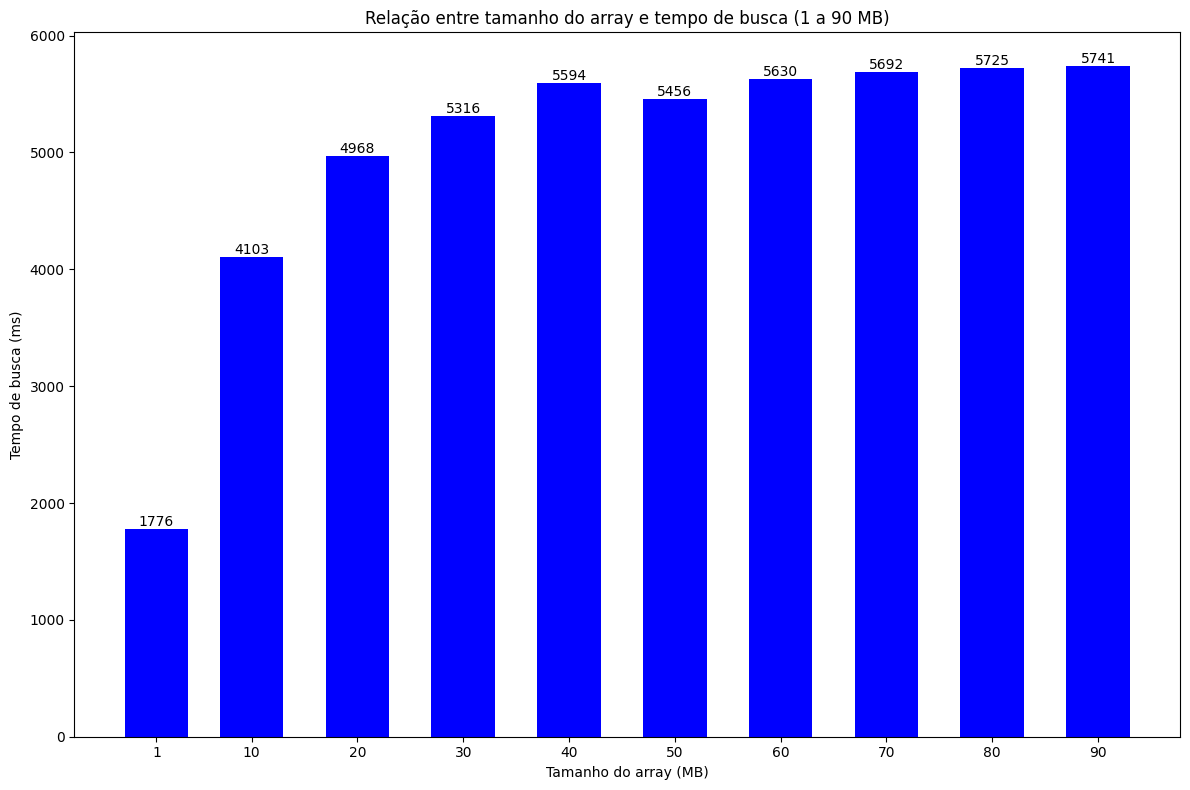

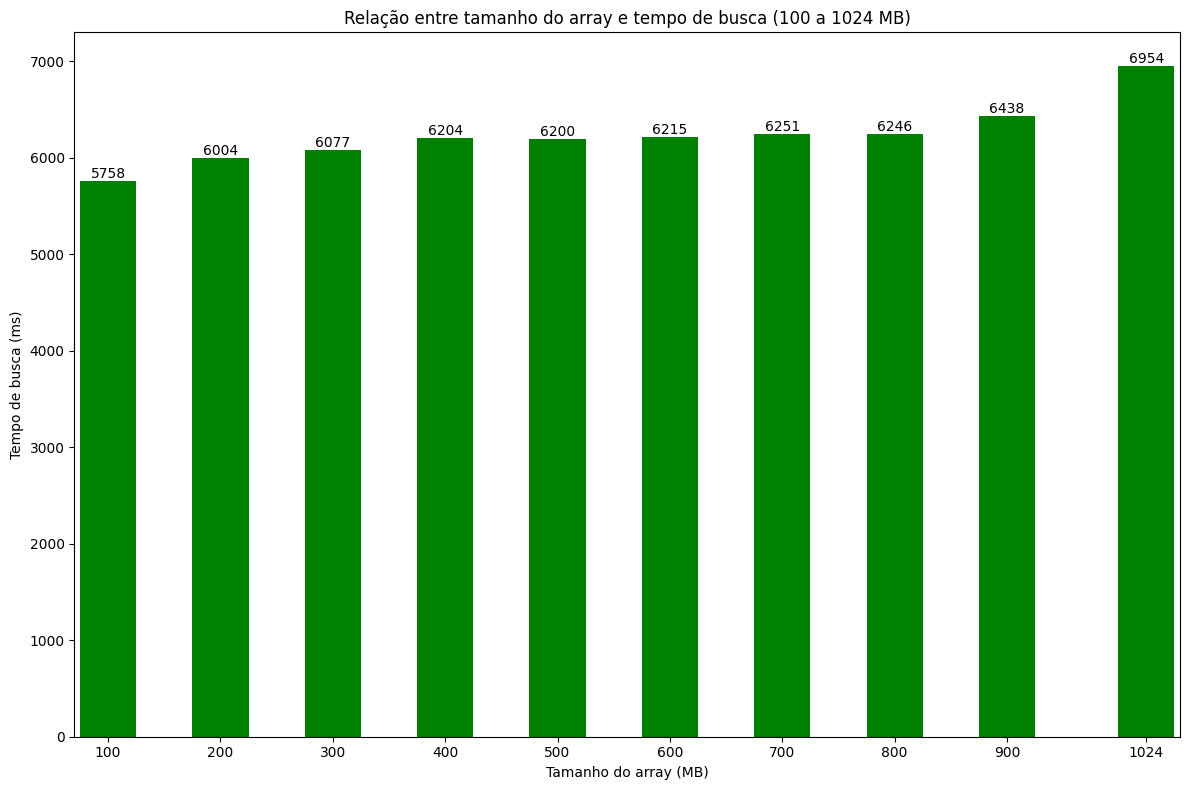

In [13]:
tempo_busca["MBinMemory"] = df_memoria["KBinMemory"] / 1024

# Separando os dados em dois subconjuntos:
df1 = tempo_busca[tempo_busca["MBinMemory"] <= 90]  # Valores de 1 a 90
df2 = tempo_busca[tempo_busca["MBinMemory"] >= 100]  # Valores de 100 até 1024

# Gráfico com valores de 1 a 90
plt.figure(figsize=(12, 8))
bars1 = plt.bar(df1["MBinMemory"], df1["SearchTime"], width=6, color='b')
plt.title("Relação entre tamanho do array e tempo de busca (1 a 90 MB)")
plt.xlabel("Tamanho do array (MB)")
plt.ylabel("Tempo de busca (ms)")
plt.xticks([1] + list(range(10, 91, 10)))

for bar in bars1:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10) 

plt.tight_layout()

plt.savefig('grafico_escalabilidade_array_01.jpeg', format='jpeg', bbox_inches='tight')

plt.show()

# Gráfico com valores de 100 a 1024
plt.figure(figsize=(12, 8))
bars2 = plt.bar(df2["MBinMemory"], df2["SearchTime"], width=50, color='g')
plt.title("Relação entre tamanho do array e tempo de busca (100 a 1024 MB)")
plt.xlabel("Tamanho do array (MB)")
plt.ylabel("Tempo de busca (ms)")
plt.xticks(list(range(100, 1000, 100)) + [1024])
plt.xlim(70, 1054)

for bar in bars2:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10)  
    
plt.savefig('grafico_escalabilidade_array_02.jpeg', format='jpeg', bbox_inches='tight')
    
plt.tight_layout()
plt.show()